# **Project I | Deep Learning: Image Classification with CNN**

Group members:

Faisal Hammad and Loz Rigby

### **Contents**
1. Introduction

  1.1 Project Overview

  1.2 Dataset

  1.3 Tools and Technologies


2. Data Exploration and Preprocessing

  2.1 Data Exploration
    
  2.2 Data Preprocessing

      2.2.1 CNN Model

    
3. Model Architecture and Evaluation

  3.1 Models involved

  3.2 CNN Model Architecture

  3.3 Model Evaluation

  3.3.1 Overview of results

  3.3.2 Model 2 Evaluation

  3.3.3 Model 3 Evaluation
  
  3.3.4 Model 4 Evaluation

  3.4 The best model

4. Transfer Learning
  
  4.1 Transfer Models preprocessing

  4.2 Transfer Learning Model

  4.2.1 "Bare-bone" Transfer Learning Model

  4.2.2 The best "bare-bone" model

  4.3 Transfer Learning with Fine Tuning

  4.3.1 What is finetuning?

  4.3.2 Finetuned Model

  4.3.3 Best model

5. Conclusion

### **1. Introduction**

**1.1 Project Overview**

The objective of this project is to build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

**1.2 Dataset**

The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.  There are 50000 training images and 10000 test images.


**1.3 Tools and Technologies**
- Python
- Google Colab
- Jupyter Notebooks
- TensorFlow
- Keras
- Scikit-learn
- NumPy
- Pandas
- Matplotlib
- Seaborn
- ImageDataGenerator (from Keras)
- Convolutional Neural Networks (CNNs)
- Transfer Learning (Pre-trained models: VGG16)
- TensorFlow Serving
- Flask

### **2. Data Exploration and Preprocessing**

**2.1 Data Exploration**

Within our initial data exploration of CIFAR-10 involves examining the dataset's structure, including its 60,000 32x32 color images categorized into 10 classes, visualizing sample images, and analyzing the distribution of images across different classes to gain insights and identify any potential imbalances or patterns before preprocessing and model training.

Code snippet:

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Training labels shape: {Y_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Testing labels shape: {Y_test.shape}')

class_counts = np.bincount(Y_train.flatten())
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_counts, tick_label=class_names)
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)


plt.figure(figsize=(15, 5))
for cls in range(num_classes):
    idxs = np.where(Y_train == cls)[0][:3]
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1
        plt.subplot(3, num_classes, plt_idx)
        plt.imshow(X_train[idx], interpolation='bilinear') #interpolation to smoothen the pixelation
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])
plt.show()

This exploration told us shapes of the training data (50000,32,32,3) and the testing data shape (10000,32,32,3). The classes were also defined with the class names for the CIFAR-10 dataset and the number of classes was calculated.

In addition, we viewed the distribution of the classes within the training data set, and displayed the first 3 images of the each of the 10 classes.

**2.2 Data Preprocessing**

Firstly, the data was reviewed for missing values, it can be presumed that there is no missing values as CIFAR-10 dataset is a well-prepared and standardized dataset. However, this was verfied and there were no missing values.

**2.2.1 CNN Model preprocessing**

The preprocessing for the CNN model defines three functions, preprocess_1, preprocess_2, and preprocess_3, which preprocess image data by normalizing it and applying augmentation techniques such as adjusting brightness, contrast, and hue, based on settings provided. Each function uses TensorFlow and the ImageDataGenerator class. The preprocessing steps vary slightly between the functions, with different augmentation parameters adjusted for each, reflecting increasing levels of augmentation intensity. Finally, each function returns the augmented data.

Code Snippet:

In [ ]:
def preprocess_1(data, setting):
# Normalization
    if setting.normalization == 'Min-Max Scaling':
        data_normalized = (data - tf.reduce_min(data)) / (tf.reduce_max(data) - tf.reduce_min(data))
    else:
        data1 = tf.cast(data, tf.float32)
        mean, variance = tf.nn.moments(data1, axes=[0, 1, 2])
        data_normalized = (data1 - mean) / tf.sqrt(variance)

# Augmentation
    datagen = ImageDataGenerator()

    if "Hue" in setting.augmentation:
        datagen.preprocessing_function = lambda img: tf.image.random_hue(img, 0.08)

    if "Brightness" in setting.augmentation:
        datagen.brightness_range = [0.8, 1.2]

    if "Contrast" in setting.augmentation:
        datagen.preprocessing_function = lambda img: tf.image.random_contrast(img, 0.8, 1.2)

    augmented_data_generator = datagen.flow(data_normalized, batch_size=len(data_normalized), shuffle=False)
    augmented_data = next(augmented_data_generator)

    return augmented_data

#---

def preprocess_2(data, setting):
# Normalization
    if setting.normalization == 'Min-Max Scaling':
        data_normalized = (data - tf.reduce_min(data)) / (tf.reduce_max(data) - tf.reduce_min(data))
    else:
        data1 = tf.cast(data, tf.float32)
        mean, variance = tf.nn.moments(data1, axes=[0, 1, 2])
        data_normalized = (data1 - mean) / tf.sqrt(variance)

# Augmentation
    datagen = ImageDataGenerator()

    if "Hue" in setting.augmentation:
        datagen.preprocessing_function = lambda img: tf.image.random_hue(img, 0.12)

    if "Brightness" in setting.augmentation:
        datagen.brightness_range = [1.8, 3.6]

    if "Contrast" in setting.augmentation:
        datagen.preprocessing_function = lambda img: tf.image.random_contrast(img, 1, 2.5)

    augmented_data_generator = datagen.flow(data_normalized, batch_size=len(data_normalized), shuffle=False)
    augmented_data = next(augmented_data_generator)

    return augmented_data

#---

def preprocess_3(data, setting):
#     global augmented_data

# Normalization
    if setting.normalization == 'Min-Max Scaling':
        data_normalized = (data - tf.reduce_min(data)) / (tf.reduce_max(data) - tf.reduce_min(data))
    else:
        data1 = tf.cast(data, tf.float32)
        mean, variance = tf.nn.moments(data1, axes=[0, 1, 2])
        data_normalized = (data1 - mean) / tf.sqrt(variance)

# Augmentation
    datagen = ImageDataGenerator()

    if "Hue" in setting.augmentation:
        datagen.preprocessing_function = lambda img: tf.image.random_hue(img, 0.19)

    if "Brightness" in setting.augmentation:
        datagen.brightness_range = [3.0, 4.2]

    if "Contrast" in setting.augmentation:
        datagen.preprocessing_function = lambda img: tf.image.random_contrast(img, 2.8, 3.2)

    augmented_data_generator = datagen.flow(data_normalized, batch_size=len(data_normalized), shuffle=False)
    augmented_data = next(augmented_data_generator)

    return augmented_data

After the preprocessing functions were defined, a settings list was established to create different combinations of the preprocessing set so that the most optimal combination can be determined when the model is trained and evaluated.

Code Snippet:

In [ ]:
settings = [
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Brightness']),
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Brightness', 'Contrast']),
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Brightness', 'Hue']),
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Contrast']),
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Hue']),
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Hue', 'Brightness', 'Contrast']),
    preprocessing_setting(normalization='Min-Max Scaling', augmentation=['Hue', 'Contrast']),
    preprocessing_setting(normalization='Standardization', augmentation=['Brightness']),
    preprocessing_setting(normalization='Standardization', augmentation=['Brightness', 'Contrast']),
    preprocessing_setting(normalization='Standardization', augmentation=['Brightness', 'Hue']),
    preprocessing_setting(normalization='Standardization', augmentation=['Contrast']),
    preprocessing_setting(normalization='Standardization', augmentation=['Hue']),
    preprocessing_setting(normalization='Standardization', augmentation=['Hue', 'Brightness', 'Contrast']),
    preprocessing_setting(normalization='Standardization', augmentation=['Hue', 'Contrast'])
]


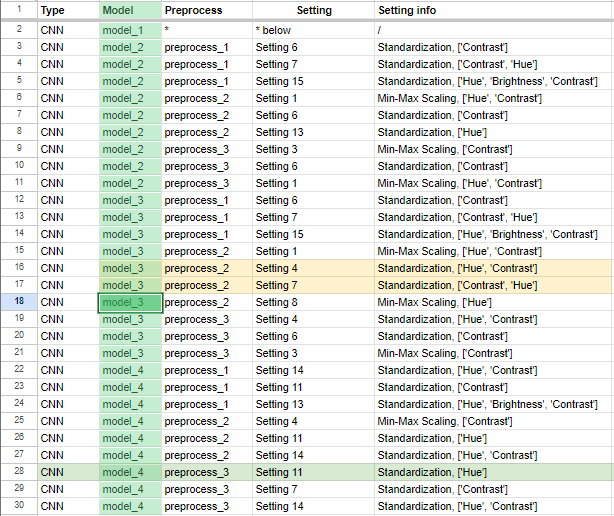

## **3. Model Architecture and Evaluation**

**3.1 Models involved**

Three overall models were used for this:
- CNN: we designed and developed a convolutional neural network to classify the images within the CIFAR-10 dataset
- Transfer Learning: using VGG-16, which consists of 16 layers, including convolutional layers with small (3x3) filters and max-pooling layers.
- Transfer Learning with finetuning: Similar to the previous transfer learning model, this involves training the entire network while allowing only the last 4 layers to update their weights, preserving the pre-trained weights of the remaining layers

**3.2 CNN Model Architecture**

Four convolutional models were created in order to find the optimal model.

**Model 1**:

This CNN model comprises two convolutional layers with 16 and 8 filters respectively, each followed by max-pooling layers. The architecture extracts features from 32x32 pixel RGB images, then flattens the output and passes it through a dense layer with 100 units. Finally, a softmax activated dense layer generates predictions across 10 classes. Compiled with the Adam optimizer and categorical crossentropy loss, the model aims for accurate classification.


Code Snippet:

In [ ]:
def convolutional_model_1():

    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

    #Conv 2
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    #Dense layer
    model.add(Dense(100, activation='relu'))

    #Final layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

**Model 2**

This CNN model features three convolutional layers, each followed by max-pooling and dropout layers for regularization, extracting hierarchical features from 32x32 pixel RGB images. Starting with 16 filters, subsequent layers employ 32 and 64 filters respectively, enhancing feature extraction complexity. After flattening, a dense layer with 128 units and dropout further refines features before a softmax activated layer generates class predictions. Compiled with the Adam optimizer and categorical crossentropy loss, the model aims to achieve accurate classification while mitigating overfitting through dropout regularization.

Code Snippet:

In [ ]:
def convolutional_model_2():

    # create model
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Dropout(0.2))
    #Conv 2
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))
    #Conv 3
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())

    #Dense layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    #Final layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

**Model 3**


This CNN model comprises three convolutional layers, each incorporating batch normalization, max-pooling, and dropout for feature extraction and regularization. Beginning with 16 filters, subsequent layers employ 64 and 256 filters, enhancing feature complexity. Following flattening, a dense layer with 512 units and dropout refines features before a softmax activated layer generates class predictions. Compiled with Adam optimizer and categorical crossentropy loss, the model aims for accurate classification while promoting stable training through batch normalization and dropout regularization.

Code Snippet:

In [ ]:
def convolutional_model_3():

    # create model
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Dropout(0.2))
    #Conv 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))
    #Conv 3
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())

    #Dense layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.4))

    #Final layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

**Model 4:**

This CNN model comprises three convolutional layers, each integrating batch normalization, max-pooling, and dropout for feature extraction and regularization. Starting with 128 filters and escalating to 256 and 512 filters, these layers progressively enhance feature complexity. After flattening, a dense layer with 1024 units and dropout further refines features before a softmax activated layer generates class predictions. Compiled with Adam optimizer and categorical crossentropy loss, the model aims for precise classification while ensuring stable training through batch normalization and dropout regularization.

Code Snippet:

In [ ]:
def convolutional_model_4():

    # create model
    model = Sequential()
    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Dropout(0.3))
    #Conv 2
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.35))
    #Conv 3
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    #Dense layer
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    #Final layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Each model will run through each preprocess and iterates through all the predefined settings.




Code Snippet:

In [ ]:
#Preprocess 3

for i, setting in enumerate(settings):
    print(f"Running model with setting {i + 1}: {setting.normalization}, {setting.augmentation}")

    # Preprocess the data
    X_train_preprocessed = preprocess_3(X_train, setting)
    X_test_preprocessed = preprocess_3(X_test, setting)

    # Build the model
    model = convolutional_model_3()
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Fit the model
    model.fit(X_train_preprocessed, Y_train, validation_data=(X_test_preprocessed, Y_test), epochs=100, batch_size=40, callbacks=[early_stopping])

    # Evaluate the model
    scores = model.evaluate(X_test_preprocessed, Y_test)
    print(f"Setting {i + 1} - Accuracy: {scores[1] * 100:.2f}% \nError: {100 - scores[1] * 100:.2f}%")

 This code example is model 3, preprocess 3 and it outputs all the evaluation data for each setting so that the highest performing can be determined.

 An early stopping callback is set up to monitor the validation loss and stop training if it doesn't improve for three consecutive epochs, restoring the best weights. The model is trained on the preprocessed training data and validated on the preprocessed testing data over a **maximum of 100 epochs with a batch size of 40**. This was the number of epochs and batch size consistently throughout model training.

 After training, the model's performance is evaluated on the preprocessed test data, and the accuracy and error rate are printed for each setting.

Examples:

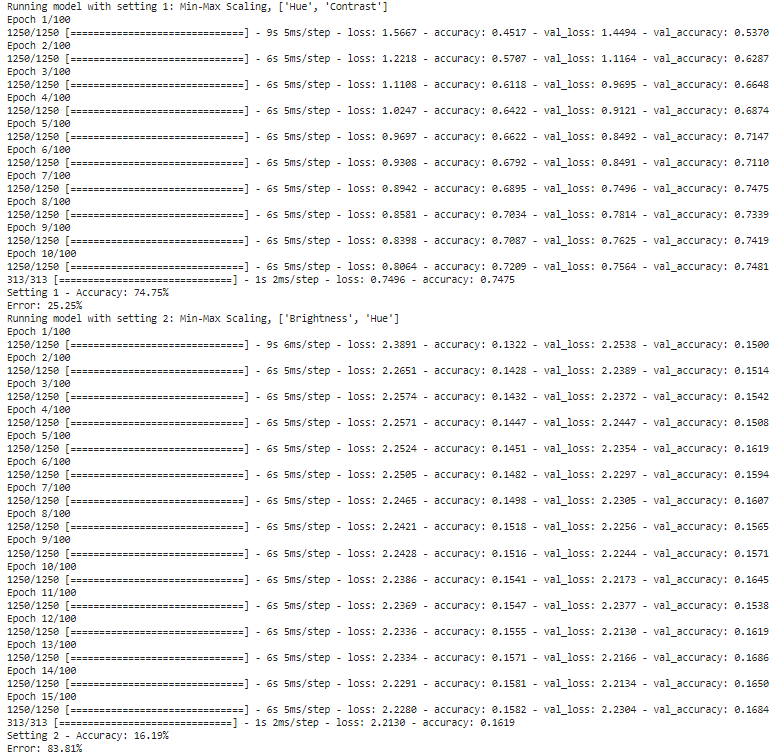

### **3.3 Model Evaluations**

**3.3.1 Overview of results**

The results for each model were averaged per preprocessing to give a better overview.

This can be seen below:

```
Model | Preprocess | Model Average
------------------------------------
  1   |    1-3     |  All below 60%**
------------------------------------
  2   |      1     |  73.53%
  2   |      2     |  73.17%
  2   |      3     |  74.10%
------------------------------------
  3   |      1     |  78.56%
  3   |      2     |  78.25%
  3   |      3     |  78.24%  
------------------------------------  
  4   |      1     |  81.16%
  4   |      2     |  81.39%
  4   |      3     |  82.35%

```

** It was established in the early stages of training that model 1 was returning a low rate of accuracy and a high loss rate so was fully trained on all preprocesses and settings.

The reason Model 1 was not effective is due to its simplicity.  As it was the inital model it contained only two convolutional layers, both with low layers (16,8).  Dropout is also not utilised in Model 1, therefore further highlighting why it was the most effective model.



**3.3.2 Model 2 Evaluation**

This convolutional neural network (CNN) model is designed for image classification tasks with images of size 32x32 and 3 color channels (RGB). The model consists of three convolutional layers with increasing filter sizes (16, 32, and 64) and decreasing kernel sizes (3x3, 2x2, 2x2), each followed by max pooling and dropout layers to reduce overfitting. After flattening the feature maps, a dense (fully connected) layer with 128 neurons is added, followed by a dropout layer, and finally, a softmax output layer with 10 neurons for multi-class classification. The model uses the Adam optimizer and categorical cross-entropy loss function, optimized for accuracy.

So, the model performs better but the filter sizes can still be increased to improve accuracy which will be done in the next model, as well as experimenting with changing the dropout rate.

Resulting in an average of 73.60% accuracy for Model 2.

**3.3.3 Model 3 Evaluation**


This convolutional neural network (CNN) model is designed for image classification with input images of size 32x32x3 (RGB). The model comprises three convolutional layers with increasing filter sizes (16, 64, and 256) and kernel sizes of 3x3, each followed by batch normalization, max pooling, and dropout layers to mitigate overfitting. After flattening the output from the convolutional layers, a dense layer with 512 neurons and dropout is added. The final layer is a softmax layer with 10 neurons for multi-class classification. The model is compiled using the Adam optimizer and categorical cross-entropy loss function, targeting accuracy as a performance metric.

The Model 3 has a larger dense layer with 512 neurons and batch normalisation is being utilised.  Model 3 is also more complex due to higher filter counts, the inclusion of batch normalization, and larger dense layers, which might result in better performance as seen in the improved accuracy rates.

Resulting in an average of 78.35% accuracy for Model 3.

**3.3.4 Model 4 Evaluation**

This convolutional neural network (CNN) is designed for image classification with input images of size 32x32x3 (RGB). It includes three convolutional layers with increasing filter sizes (128, 256, 512) and 3x3 kernels, each followed by batch normalization, max pooling, and dropout layers to mitigate overfitting. The network then flattens the output and adds a dense layer with 1024 neurons and a dropout layer before the final softmax layer with 10 neurons for multi-class classification. The model uses the Adam optimizer and categorical cross-entropy loss function, targeting accuracy as the performance metric.

Model 4 uses significantly larger filter sizes: 128, 256, and 512, compared Model 3. Model 4 also includes a much larger dense layer with 1024 neurons and the dropout rates are higher in Model_4 (0.3, 0.35, 0.4, 0.5) compared to the previous models.

Model 4 is more complex and explains why it has a higher capacity for learning due to the larger number of filters and a larger dense layer, potentially leading to the better performance on complex datasets.

Resulting in an average of 81.63% accuracy for Model 4.

### **3.4 The best model**

In [ ]:
def convolutional_model_4():

    # create model
    model = Sequential()
    model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
    model.add(Dropout(0.3))
    #Conv 2
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.35))
    #Conv 3
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    #Dense layer
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    #Final layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model



# Compile the model with the best performance leaving out the iteration.
# Preprocess the data
X_train_preprocessed = preprocess_3(X_train, settings[13])
X_test_preprocessed = preprocess_3(X_test, settings[13])

# Build the model
model = convolutional_model_4()
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  ## Increased early stopping from iteration version

# Fit the model
model.fit(X_train_preprocessed, Y_train, validation_data=(X_test_preprocessed, Y_test), epochs=100, batch_size=40, callbacks=[early_stopping])

# Evaluate the model
scores = model.evaluate(X_test_preprocessed, Y_test)
print(f"Setting {i + 1} - Accuracy: {scores[1] * 100:.2f}% \nError: {100 - scores[1] * 100:.2f}%")

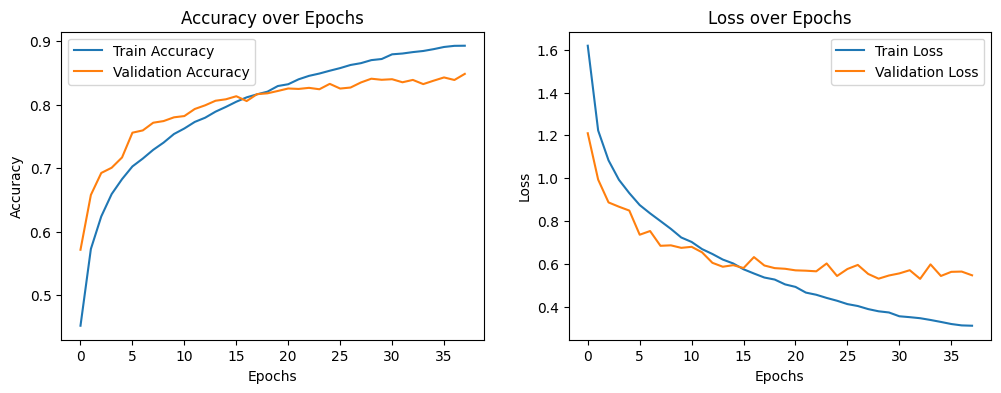

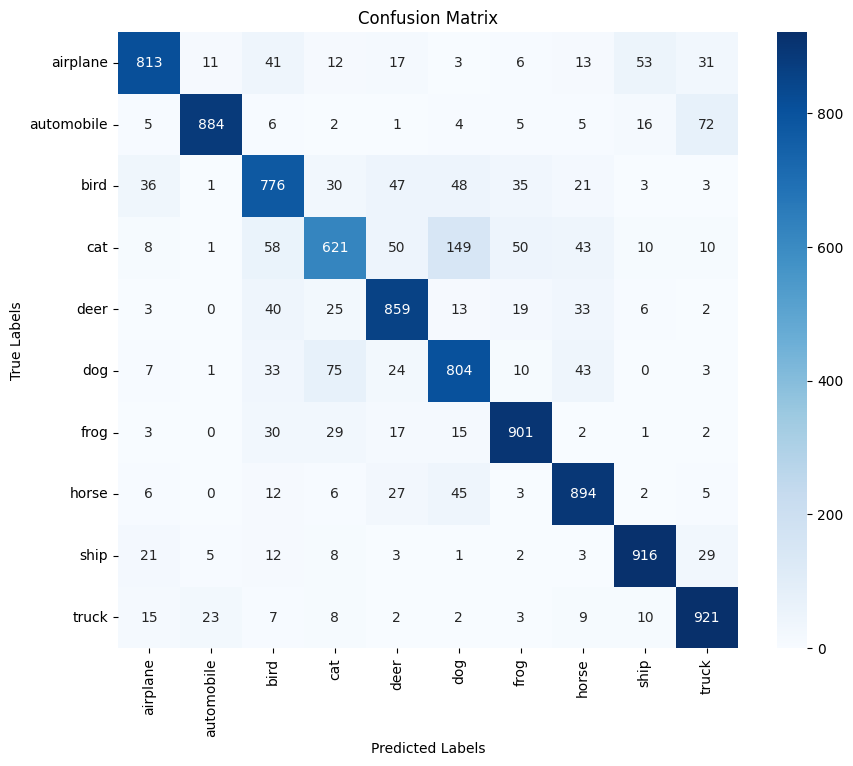


This convolutional neural network (CNN) model is highly effective for image classification due to its comprehensive architecture and robust preprocessing techniques. The model includes multiple convolutional layers with increasing filter sizes (128, 256, 512) to capture hierarchical image features, combined with batch normalization layers to stabilize and accelerate training. Max pooling layers and dropout layers with varying rates (0.3, 0.35, 0.4, 0.5) help reduce overfitting by controlling the model complexity and reducing spatial dimensions. Additionally, the use of a dense layer with 1024 neurons enhances the model's ability to learn complex patterns, and the softmax output layer provides probabilities for the 10 classes.

As seen in the confusion matrix the model performs well on several classes (like "automobile" and "truck"), but struggles with some (like "cat" and "dog"), often confusing visually similar classes.  Overall, this confusion matrix suggests a positive performance of the classification model. However, there is always areas for improvement, such as in reducing the misclassification rates between certain classes

A key strength of this model lies in its preprocessing steps. The data undergoes standardization, which normalizes the pixel values, improving convergence during training. Data augmentation, including transformations like rotations, shifts, and flips, increases the diversity of the training set, making the model more robust to variations in input images. The use of hue adjustments further diversifies the dataset by altering the color properties, which helps the model become invariant to color changes. The specific preprocessing setting used combines these techniques effectively, ensuring the model trains on a well-prepared dataset that enhances generalization. Additionally, early stopping based on validation loss prevents overfitting by halting training once the model's performance on validation data stops improving, thus preserving the best weights. Overall, these strategies make the model robust, accurate, and well-suited for image classification tasks.

## **4. Transfer Learning**

- VGG-16



**4.1 Transfer Models (With and without finetuning) preprocessing**

The preprocessing for the transfer learning was undertaken by converting the pixel values of the image data in both the training and testing sets to floating-point numbers between 0 and 1 by dividing them by 255. This normalization step ensures that all pixel values are within the same range. Additionally, the categorical labels in both the training and testing sets are one-hot encoded using to_categorical function from Keras, converting them into binary vectors representing the categories.

Code Snippet

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### **4.2 Transfer Learning Model**

**4.2.1 "Bare-bone" Transfer Learning Model**

Many models were cycled through and used to experiment in order to try and find the best performing model using VGG-16 on the CIFAR-10 dataset.

Code snippet:

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = Flatten()(base_model.output)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'F1 Score: {f1}')

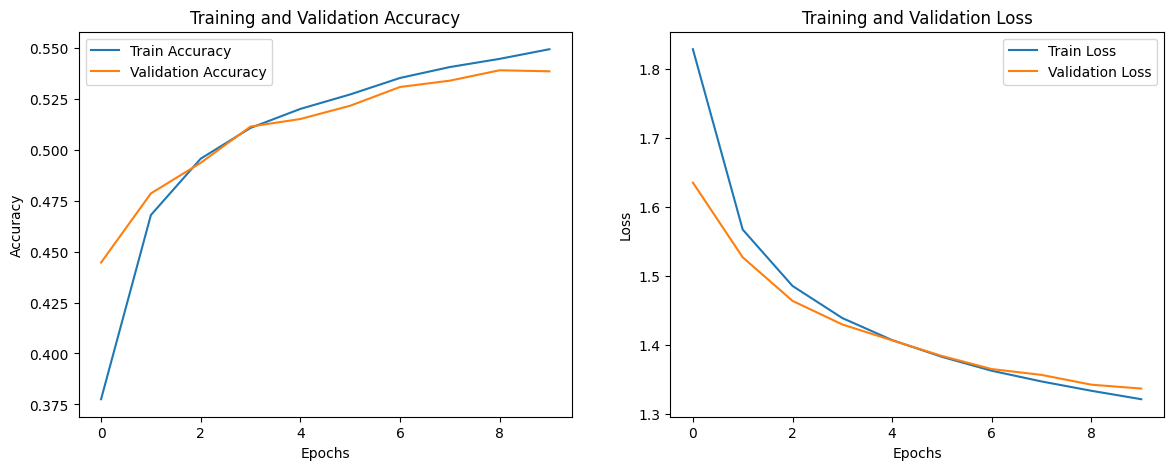

Overall, all models designed produced low accuracy rates with issues around overfitting .

We came to the conclusion that getting a highly accurate model will not be possible as utilizing transfer learning for image classification on CIFAR-10 presents several hurdles. The dataset's smaller, lower-resolution images compared to those used for pre-training can lead to information loss during feature extraction. CIFAR-10's simpler object categories diverge from the diversity seen in ImageNet, potentially impacting the transferability of learned features. Furthermore, the pre-trained model's architecture and hyperparameters might not align optimally with CIFAR-10, necessitating extensive fine-tuning. Overfitting risks are heightened due to CIFAR-10's modest size, demanding careful regularization techniques.

**4.2.2 Exploration of "bare-bone" model**

Alternative models took place such as changing the optimiser, adding more layers, alterning filter sizes, batch sizes and epochs prior to fine-tuning

This was to experiment with more complex models in order to be used for the base of the finetuning.  Many models were altered to review the different outcomes.

Code Snippet:

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'F1 Score: {f1}')

Test Loss: 1.1618000268936157
Test Accuracy: 0.5940999984741211
F1 Score: 0.5905071324272492

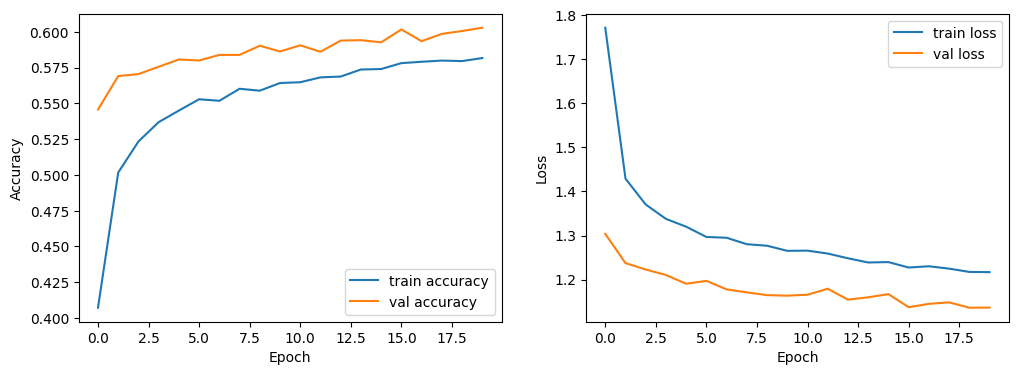

Adding multiple more layers, epochs, optmisers, filters, batchnormalisation and data augmentation,  raised the accuracy however created more issues with overfitting, despite the measures taken to limit these.
This is due to issues described in the notes on the bare bone model.

**4.3 Transfer Learning with Fine tuning**

**4.3.1 What is finetuning?**

Fine-tuning in transfer learning involves taking a pre-trained neural network and adjusting its weights by further training it on a new, related dataset. This process adapts the model's learned features to better suit the specific characteristics of the new task, leveraging knowledge from the original dataset to improve performance.

**4.3.2 Finetuned Model**

The best performing more complex moderations of the "bare-bone" model was then used as the base for the fine tuning model.

Each model iteration introduces slight variations in architecture, training parameters, and data augmentation techniques to potentially improve performance. These changes are experimented with to find the best combination for the CIFAR-10 classification task.


The models are based on the VGG16 architecture with varying degrees of modifications and training strategies. They incorporate data augmentation techniques like rotation, shift, and flip for improved generalization. Each model follows a pattern of initial training followed by fine-tuning, with differences in the number of epochs for each phase and the extent of freezing/unfreezing layers. Additionally, Model 3 introduces global average pooling and employs different dropout rates and callbacks for early stopping and learning rate adjustments. Model 5 further enhances data augmentation with zoom and shear techniques and employs a different fully connected layer architecture with a higher initial learning rate. Each model aims to optimize performance on the CIFAR-10 dataset, with iterations refining strategies for improved accuracy and generalization.

Example of model tested:
Code Snippet:

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Split training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Load VGG16 model with ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build the model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with frozen layers
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=40, validation_data=(x_val, y_val))

# Fine-tuning: unfreeze some of the deeper layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training with fine-tuning
fine_tune_epochs = 10
total_epochs = 20 + fine_tune_epochs

history_fine = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                         epochs=total_epochs, initial_epoch=40, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_test_classes, y_pred_classes, average='macro')

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'F1 Score: {f1}')

Test Loss: 1.1611077785491943
Test Accuracy: 0.5935999751091003
F1 Score: 0.5882540400065499

**4.3.3 Best Model**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                    epochs=50, validation_data=(X_val, Y_val), callbacks=[early_stopping])

for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

fine_tune_epochs = 50
total_epochs = 50 + fine_tune_epochs

history_fine = model.fit(datagen.flow(X_train, Y_train, batch_size=32),
                         epochs=total_epochs, initial_epoch=50, validation_data=(X_val, Y_val), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)
f1 = f1_score(Y_test_classes, Y_pred_classes, average='macro')

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'F1 Score: {f1}')

Test Loss: 0.76231449842453
Test Accuracy: 0.744700014591217
F1 Score: 0.7404975630386618

Epochs: 73

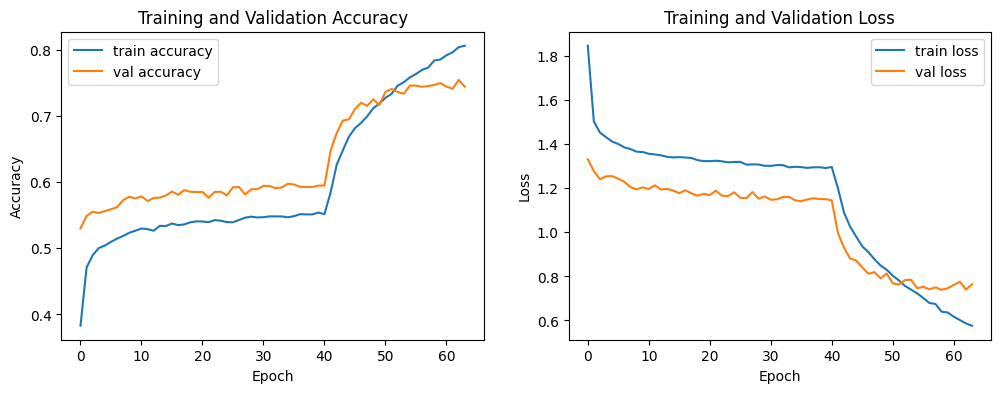

The step in teh graph is due to when the last four layers of VGG-16 are unfrozen, the model can fine-tune these layers to better capture the details specific to CIFAR-10. This results in a significant improvement in both training and validation accuracy and a noticeable drop in loss.

This model demonstrates several key characteristics that contribute to its effectiveness. Firstly, it employs transfer learning by utilizing the VGG16 architecture pre-trained on ImageNet, which leverages learned features from a large dataset to enhance performance on CIFAR-10. Secondly, it incorporates extensive data augmentation, including rotation, shifting, and flipping, which enriches the dataset and improves the model's ability to generalize to unseen data. Additionally, the model architecture includes batch normalization and dropout layers, which help mitigate overfitting and stabilize training. The use of early stopping prevents overfitting by halting training when validation loss begins to increase. Finally, fine-tuning the last few layers of the base model further adapts it to the CIFAR-10 dataset, leading to improved performance. Overall, these elements combine to create a robust and efficient model with strong predictive capabilities on the CIFAR-10 dataset.]



### **5. Conclusion**

In this report, we explored various approaches to improve image classification performance on the CIFAR-10 dataset. Our most effective model was a custom Convolutional Neural Network (CNN), which, after extensive preprocessing and data augmentation, achieved satisfactory results. This model's architecture, incorporating layers such as batch normalization and dropout, proved robust in mitigating overfitting and stabilizing the training process.

Despite initial expectations, transfer learning models, specifically those using pre-trained architectures like VGG16, did not perform as well on the CIFAR-10 dataset. This could be attributed to the domain-specific nature of CIFAR-10 images, which might differ significantly from the images in the ImageNet dataset on which these models were initially trained.

Ultimately, our custom CNN demonstrated strong predictive capabilities, highlighting the importance of model architecture and data preprocessing in tackling specific image classification tasks. Further fine-tuning and experimentation could potentially yield even better results, but the current model already represents a significant step forward in effective image classification for the CIFAR-10 dataset.